In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import pickle
import datetime
import random

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [19]:
# evaluate augmentation type

In [14]:
res = pd.read_csv('/home/ngrav/project/wearables/results/eval_test_v44.csv')

In [15]:
rows2drop = [2*i+1 for i in range(res.shape[0]//2 + 1)]
res = res.loc[~res.index.isin(rows2drop), :]
res['exp_mode'] = res['exp_trial'].apply(lambda x: x.split('cnnl1l2')[1].split('_')[0])

In [18]:
res['exp_mode'] = res['exp_trial'].apply(lambda x: x.split('cnnl1l2')[1].split('_')[0])

In [35]:
for col in ['loss', 'mae', 'rho', 'P_rho']:
    res[col] = res[col].astype(float)

In [37]:
dt = res.groupby('exp_mode').mean().reset_index()

In [47]:
dt

,exp_mode,Unnamed: 0,loss,mae,rho,P_rho
0,allaug,0.0,100.182988,8.309401,0.357875,1.191689e-15
1,allaugperepoch,0.0,117.088155,8.163038,0.405721,9.246529e-24
2,randaug,0.0,106.461063,7.996012,0.346998,3.268497e-19
3,randaugperepoch,0.0,118.273656,7.860784,0.349948,1.262636e-18


<AxesSubplot:xlabel='exp_mode', ylabel='mae'>

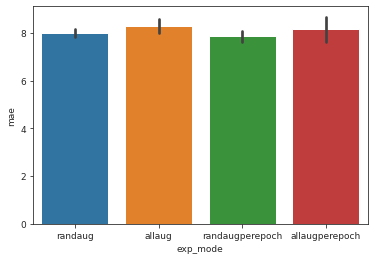

In [41]:
sns.barplot(x='exp_mode', y='mae', data=res, ci='sd')

<AxesSubplot:xlabel='exp_mode', ylabel='rho'>

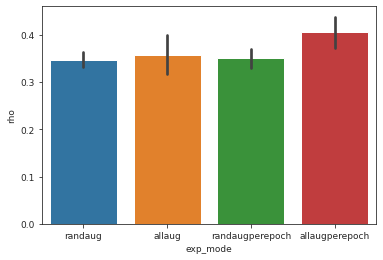

In [49]:
sns.barplot(x='exp_mode', y='rho', data=res, ci='sd')

In [42]:
from scipy.stats import wilcoxon

In [46]:
wilcoxon(res.loc[res['exp_mode']=='randaugperepoch', 'mae'],
         res.loc[res['exp_mode']=='randaug', 'mae'])

WilcoxonResult(statistic=7.0, pvalue=0.5625)

In [50]:
wilcoxon(res.loc[res['exp_mode']=='randaugperepoch', 'rho'],
         res.loc[res['exp_mode']=='allaugperepoch', 'rho'])

WilcoxonResult(statistic=1.0, pvalue=0.0625)